In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

#works with k=1, gamma=0.99, lr_g=0.0002, lr_d=0.0004
# testing k=1, gamma=0.99, lr_g=0.0003, lr_d=0.0006

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers

# pass in decaying learning rate
optim_g = optim.Adam(generator.parameters(), lr=0.0003)# for part a/b use .0003
optim_d = optim.Adam(discriminator.parameters(), lr=0.0006)# for part a/b use .0006

#use for part c)
scheduler_g = optim.lr_scheduler.ExponentialLR(optim_g, gamma=0.99)
scheduler_d = optim.lr_scheduler.ExponentialLR(optim_d, gamma=0.99)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
#     data = -torch.ones(size, 1)
    return data.to(device)

In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:50,  2.35it/s]                                                        


Epoch 1 of 100
Generator loss: 2.26513410, Discriminator loss: 1.22587073


118it [00:49,  2.37it/s]                                                        


Epoch 2 of 100
Generator loss: 3.55866432, Discriminator loss: 1.04813933


118it [00:49,  2.37it/s]                                                        


Epoch 3 of 100
Generator loss: 5.63233423, Discriminator loss: 1.15407252


118it [00:49,  2.37it/s]                                                        


Epoch 4 of 100
Generator loss: 4.36559010, Discriminator loss: 0.66430300


118it [00:49,  2.38it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


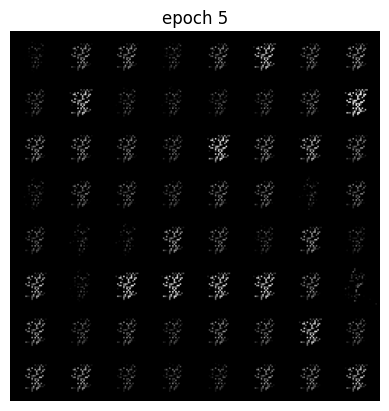

Epoch 5 of 100
Generator loss: 5.76298952, Discriminator loss: 0.86630636


118it [00:49,  2.38it/s]                                                        


Epoch 6 of 100
Generator loss: 1.66635990, Discriminator loss: 1.03435767


118it [00:50,  2.34it/s]                                                        


Epoch 7 of 100
Generator loss: 1.62176681, Discriminator loss: 0.91161233


118it [00:52,  2.27it/s]                                                        


Epoch 8 of 100
Generator loss: 2.27944374, Discriminator loss: 0.87503278


118it [00:52,  2.26it/s]                                                        


Epoch 9 of 100
Generator loss: 1.82691538, Discriminator loss: 1.12762725


118it [00:51,  2.28it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


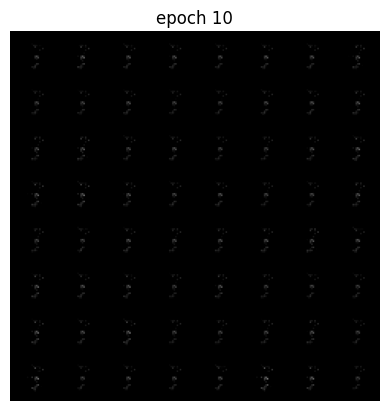

Epoch 10 of 100
Generator loss: 2.07602000, Discriminator loss: 0.91682345


118it [00:53,  2.20it/s]                                                        


Epoch 11 of 100
Generator loss: 3.75081134, Discriminator loss: 0.97326916


118it [00:51,  2.28it/s]                                                        


Epoch 12 of 100
Generator loss: 2.18530941, Discriminator loss: 1.17689741


118it [00:53,  2.23it/s]                                                        


Epoch 13 of 100
Generator loss: 2.09618759, Discriminator loss: 1.03101051


118it [00:49,  2.37it/s]                                                        


Epoch 14 of 100
Generator loss: 1.81255186, Discriminator loss: 0.80961478


118it [00:50,  2.36it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


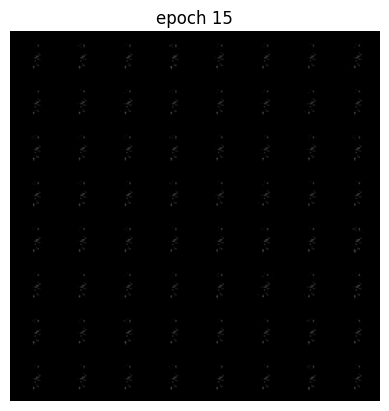

Epoch 15 of 100
Generator loss: 3.25580263, Discriminator loss: 0.97068459


118it [00:49,  2.38it/s]                                                        


Epoch 16 of 100
Generator loss: 3.93821001, Discriminator loss: 0.30758813


118it [00:50,  2.34it/s]                                                        


Epoch 17 of 100
Generator loss: 5.71311569, Discriminator loss: 0.32348999


118it [00:52,  2.24it/s]                                                        


Epoch 18 of 100
Generator loss: 6.10298777, Discriminator loss: 0.26579347


118it [00:53,  2.19it/s]                                                        


Epoch 19 of 100
Generator loss: 5.42278957, Discriminator loss: 0.44750929


118it [00:55,  2.11it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


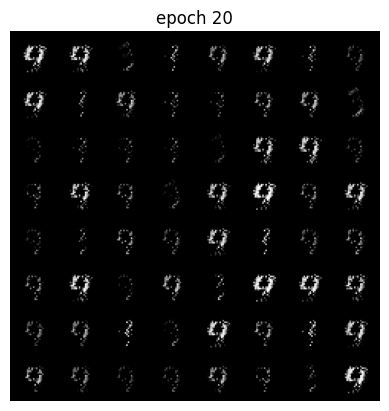

Epoch 20 of 100
Generator loss: 6.16803408, Discriminator loss: 0.36970639


118it [00:53,  2.22it/s]                                                        


Epoch 21 of 100
Generator loss: 3.97861814, Discriminator loss: 0.45501664


118it [00:52,  2.25it/s]                                                        


Epoch 22 of 100
Generator loss: 3.88934612, Discriminator loss: 0.52541888


118it [00:51,  2.27it/s]                                                        


Epoch 23 of 100
Generator loss: 3.74897718, Discriminator loss: 0.54160321


118it [00:51,  2.27it/s]                                                        


Epoch 24 of 100
Generator loss: 3.84555602, Discriminator loss: 0.48308498


118it [00:52,  2.23it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


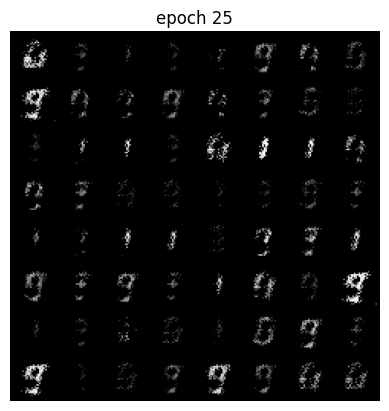

Epoch 25 of 100
Generator loss: 3.62737036, Discriminator loss: 0.40107661


118it [00:50,  2.34it/s]                                                        


Epoch 26 of 100
Generator loss: 3.62866402, Discriminator loss: 0.42435795


118it [00:50,  2.35it/s]                                                        


Epoch 27 of 100
Generator loss: 3.93274498, Discriminator loss: 0.41683921


118it [00:49,  2.36it/s]                                                        


Epoch 28 of 100
Generator loss: 3.80213118, Discriminator loss: 0.32978866


118it [00:50,  2.35it/s]                                                        


Epoch 29 of 100
Generator loss: 3.51767802, Discriminator loss: 0.42296255


118it [00:50,  2.34it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


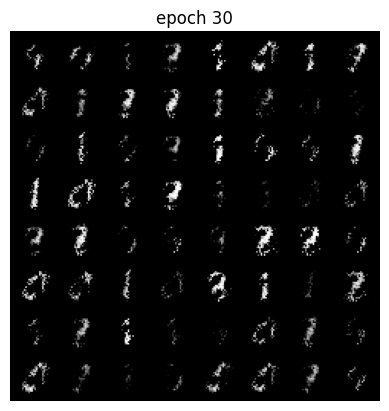

Epoch 30 of 100
Generator loss: 3.75777245, Discriminator loss: 0.34177402


118it [00:50,  2.33it/s]                                                        


Epoch 31 of 100
Generator loss: 3.37966180, Discriminator loss: 0.43945369


118it [00:50,  2.34it/s]                                                        


Epoch 32 of 100
Generator loss: 4.03420162, Discriminator loss: 0.31784090


118it [00:50,  2.35it/s]                                                        


Epoch 33 of 100
Generator loss: 3.85870576, Discriminator loss: 0.30108613


118it [00:50,  2.35it/s]                                                        


Epoch 34 of 100
Generator loss: 3.79413080, Discriminator loss: 0.29001248


118it [00:50,  2.35it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


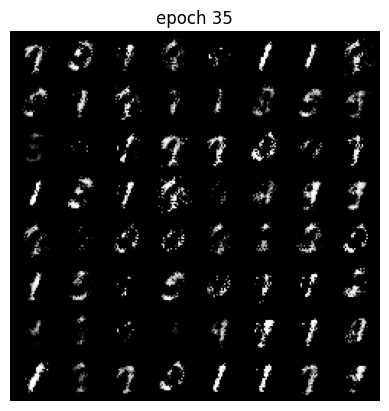

Epoch 35 of 100
Generator loss: 3.86503386, Discriminator loss: 0.34390193


118it [00:50,  2.33it/s]                                                        


Epoch 36 of 100
Generator loss: 3.48116231, Discriminator loss: 0.37215015


118it [00:50,  2.35it/s]                                                        


Epoch 37 of 100
Generator loss: 3.70949149, Discriminator loss: 0.37801397


118it [00:51,  2.28it/s]                                                        


Epoch 38 of 100
Generator loss: 3.75765133, Discriminator loss: 0.35281482


118it [00:58,  2.03it/s]                                                        


Epoch 39 of 100
Generator loss: 3.89550710, Discriminator loss: 0.34793088


118it [00:52,  2.25it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


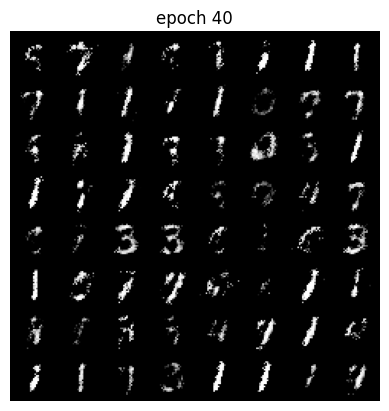

Epoch 40 of 100
Generator loss: 3.40480280, Discriminator loss: 0.42027393


118it [00:54,  2.18it/s]                                                        


Epoch 41 of 100
Generator loss: 3.64161086, Discriminator loss: 0.34620276


118it [00:55,  2.11it/s]                                                        


Epoch 42 of 100
Generator loss: 3.59243250, Discriminator loss: 0.35196906


118it [01:08,  1.73it/s]                                                        


Epoch 43 of 100
Generator loss: 3.75256944, Discriminator loss: 0.35018525


118it [01:02,  1.90it/s]                                                        


Epoch 44 of 100
Generator loss: 3.45253778, Discriminator loss: 0.40129131


118it [00:59,  1.97it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


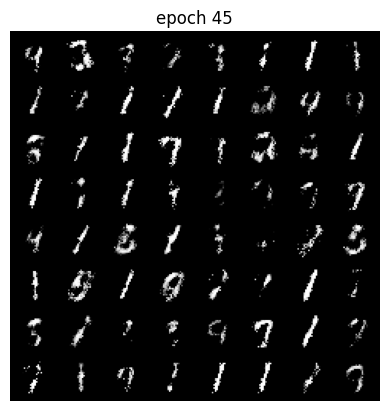

Epoch 45 of 100
Generator loss: 3.44732141, Discriminator loss: 0.38752091


118it [00:53,  2.22it/s]                                                        


Epoch 46 of 100
Generator loss: 3.36940885, Discriminator loss: 0.37295440


118it [00:52,  2.25it/s]                                                        


Epoch 47 of 100
Generator loss: 3.48557353, Discriminator loss: 0.36535937


118it [00:50,  2.32it/s]                                                        


Epoch 48 of 100
Generator loss: 3.20590878, Discriminator loss: 0.37776083


118it [00:51,  2.29it/s]                                                        


Epoch 49 of 100
Generator loss: 3.23938060, Discriminator loss: 0.37352031


118it [00:50,  2.33it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


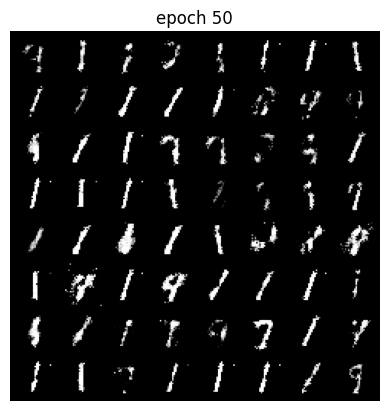

Epoch 50 of 100
Generator loss: 3.11243033, Discriminator loss: 0.38195598


118it [00:51,  2.31it/s]                                                        


Epoch 51 of 100
Generator loss: 3.06686091, Discriminator loss: 0.40293765


118it [00:50,  2.35it/s]                                                        


Epoch 52 of 100
Generator loss: 3.11069441, Discriminator loss: 0.39354596


118it [00:50,  2.34it/s]                                                        


Epoch 53 of 100
Generator loss: 2.94124794, Discriminator loss: 0.43390492


118it [00:51,  2.30it/s]                                                        


Epoch 54 of 100
Generator loss: 2.91656590, Discriminator loss: 0.43876508


118it [00:50,  2.36it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


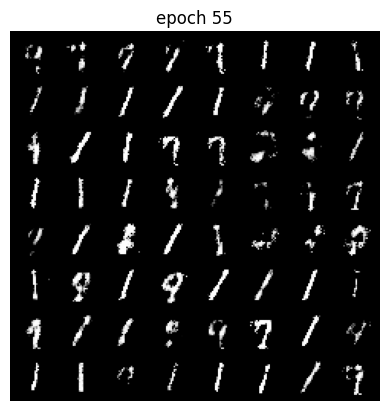

Epoch 55 of 100
Generator loss: 2.92997479, Discriminator loss: 0.43770307


118it [00:50,  2.35it/s]                                                        


Epoch 56 of 100
Generator loss: 2.91117215, Discriminator loss: 0.43831322


118it [00:50,  2.34it/s]                                                        


Epoch 57 of 100
Generator loss: 2.83752346, Discriminator loss: 0.44986826


118it [00:50,  2.32it/s]                                                        


Epoch 58 of 100
Generator loss: 2.92206430, Discriminator loss: 0.45886391


118it [00:50,  2.35it/s]                                                        


Epoch 59 of 100
Generator loss: 3.08101225, Discriminator loss: 0.41634196


118it [00:50,  2.34it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


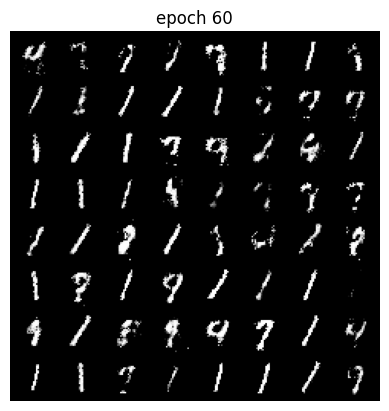

Epoch 60 of 100
Generator loss: 2.90209222, Discriminator loss: 0.44972301


118it [00:53,  2.20it/s]                                                        


Epoch 61 of 100
Generator loss: 2.83386946, Discriminator loss: 0.46538830


118it [00:55,  2.14it/s]                                                        


Epoch 62 of 100
Generator loss: 2.81096816, Discriminator loss: 0.46949926


118it [00:53,  2.20it/s]                                                        


Epoch 63 of 100
Generator loss: 2.77144957, Discriminator loss: 0.48461416


118it [00:54,  2.17it/s]                                                        


Epoch 64 of 100
Generator loss: 2.62825370, Discriminator loss: 0.50944400


118it [00:59,  1.97it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


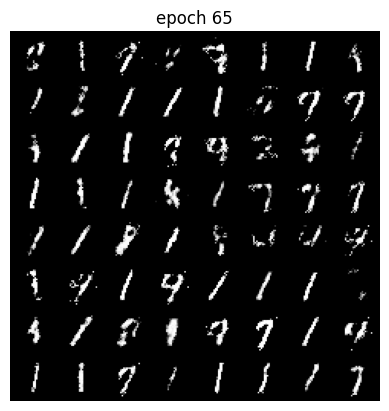

Epoch 65 of 100
Generator loss: 2.64678144, Discriminator loss: 0.51974380


118it [00:54,  2.17it/s]                                                        


Epoch 66 of 100
Generator loss: 2.56977439, Discriminator loss: 0.51624614


118it [00:51,  2.30it/s]                                                        


Epoch 67 of 100
Generator loss: 2.64793992, Discriminator loss: 0.51016992


118it [00:51,  2.31it/s]                                                        


Epoch 68 of 100
Generator loss: 2.63249826, Discriminator loss: 0.52115226


118it [00:54,  2.15it/s]                                                        


Epoch 69 of 100
Generator loss: 2.78179502, Discriminator loss: 0.49572769


118it [00:51,  2.31it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


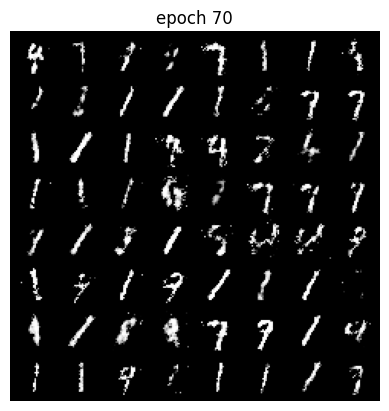

Epoch 70 of 100
Generator loss: 2.59563470, Discriminator loss: 0.53830725


118it [00:51,  2.31it/s]                                                        


Epoch 71 of 100
Generator loss: 2.64657903, Discriminator loss: 0.52972680


118it [00:55,  2.14it/s]                                                        


Epoch 72 of 100
Generator loss: 2.66471219, Discriminator loss: 0.51023406


118it [00:52,  2.24it/s]                                                        


Epoch 73 of 100
Generator loss: 2.54759622, Discriminator loss: 0.53895575


118it [00:51,  2.29it/s]                                                        


Epoch 74 of 100
Generator loss: 2.52713776, Discriminator loss: 0.54163587


118it [00:50,  2.32it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


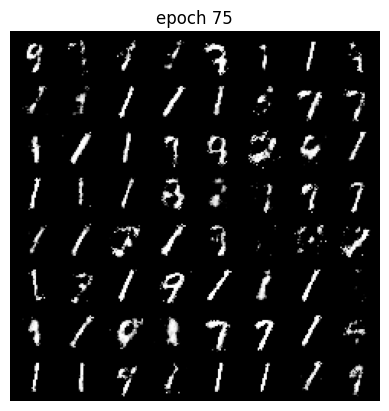

Epoch 75 of 100
Generator loss: 2.48216391, Discriminator loss: 0.56059706


118it [00:51,  2.28it/s]                                                        


Epoch 76 of 100
Generator loss: 2.44382334, Discriminator loss: 0.56654972


118it [00:50,  2.33it/s]                                                        


Epoch 77 of 100
Generator loss: 2.53272581, Discriminator loss: 0.55581468


118it [00:50,  2.33it/s]                                                        


Epoch 78 of 100
Generator loss: 2.42264509, Discriminator loss: 0.58502525


118it [00:50,  2.34it/s]                                                        


Epoch 79 of 100
Generator loss: 2.34820032, Discriminator loss: 0.60118175


118it [00:50,  2.33it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


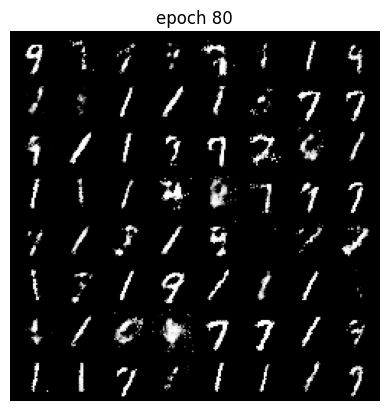

Epoch 80 of 100
Generator loss: 2.28677082, Discriminator loss: 0.62367696


118it [00:50,  2.34it/s]                                                        


Epoch 81 of 100
Generator loss: 2.31120825, Discriminator loss: 0.61999762


118it [00:50,  2.33it/s]                                                        


Epoch 82 of 100
Generator loss: 2.30175138, Discriminator loss: 0.59566510


118it [00:50,  2.34it/s]                                                        


Epoch 83 of 100
Generator loss: 2.23500633, Discriminator loss: 0.60978764


118it [00:50,  2.33it/s]                                                        


Epoch 84 of 100
Generator loss: 2.29679418, Discriminator loss: 0.63457483


118it [00:50,  2.32it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


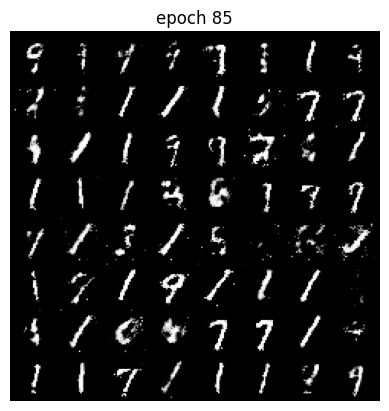

Epoch 85 of 100
Generator loss: 2.29796553, Discriminator loss: 0.62872410


118it [00:50,  2.34it/s]                                                        


Epoch 86 of 100
Generator loss: 2.23410487, Discriminator loss: 0.62838125


118it [06:09,  3.13s/it]                                                        


Epoch 87 of 100
Generator loss: 2.29271007, Discriminator loss: 0.63002515


118it [00:52,  2.24it/s]                                                        


Epoch 88 of 100
Generator loss: 2.22599745, Discriminator loss: 0.65051812


118it [00:53,  2.21it/s]                                                        


Epoch 89 of 100
Generator loss: 2.23956347, Discriminator loss: 0.64588219


118it [00:51,  2.27it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


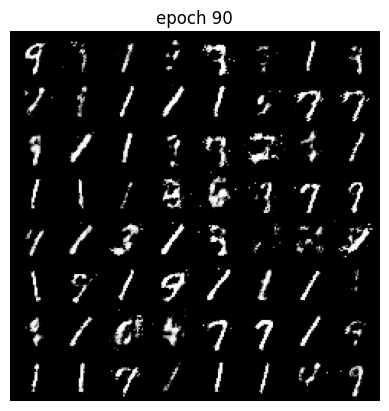

Epoch 90 of 100
Generator loss: 2.22935009, Discriminator loss: 0.64972228


118it [00:51,  2.30it/s]                                                        


Epoch 91 of 100
Generator loss: 2.16361618, Discriminator loss: 0.65312499


118it [00:51,  2.31it/s]                                                        


Epoch 92 of 100
Generator loss: 2.12855339, Discriminator loss: 0.66484630


118it [00:51,  2.28it/s]                                                        


Epoch 93 of 100
Generator loss: 2.12914467, Discriminator loss: 0.68458492


118it [00:51,  2.29it/s]                                                        


Epoch 94 of 100
Generator loss: 2.23005342, Discriminator loss: 0.66104794


118it [00:50,  2.33it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


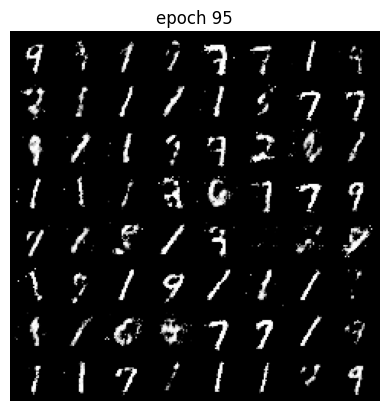

Epoch 95 of 100
Generator loss: 2.13367081, Discriminator loss: 0.66320723


118it [00:50,  2.32it/s]                                                        


Epoch 96 of 100
Generator loss: 2.15093803, Discriminator loss: 0.67047173


118it [00:50,  2.33it/s]                                                        


Epoch 97 of 100
Generator loss: 2.17947960, Discriminator loss: 0.66654187


118it [00:50,  2.33it/s]                                                        


Epoch 98 of 100
Generator loss: 2.20865178, Discriminator loss: 0.66056961


118it [00:50,  2.32it/s]                                                        


Epoch 99 of 100
Generator loss: 2.18039298, Discriminator loss: 0.67242062


118it [00:50,  2.33it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


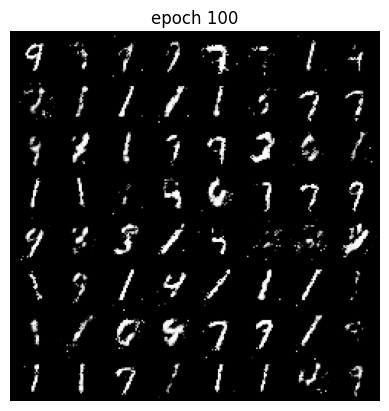

Epoch 100 of 100
Generator loss: 2.13860512, Discriminator loss: 0.67754424


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    loss = criterion(output, true_label)
    loss.backward()
    optim_g.step()
    return loss
    
    ######################################

    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
        
    loss_real = criterion(output, true_label)
    output_fake = discriminator(data_fake)
    loss_fake = criterion(output_fake, fake_label)
    loss_real.backward()
    loss_fake.backward()
    optim_d.step()
    return loss_real + loss_fake
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    # bi is index
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        
        
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        # run the discriminator for k number of steps
        for step in range(k):
            
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            
            b_size = data_real.size(0)
            true_label = label_real(b_size)
            fake_label = label_fake(b_size)
            optim_d.zero_grad()
            output = discriminator(data_real)
            
            loss_d += discriminator_loss(output, true_label)
        
        data_fake = generator(create_noise(b_size, nz))
        
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        optim_g.zero_grad()
        output = discriminator(data_fake)
        
        # used for part a/c
        loss_g += generator_loss(output, true_label)
        #used for part b)
#         loss_g += generator_loss(output, fake_label)
        
        
        # used for part c)
    scheduler_d.step()
    scheduler_g.step()
        
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.item())
    losses_d.append(epoch_loss_d.item())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

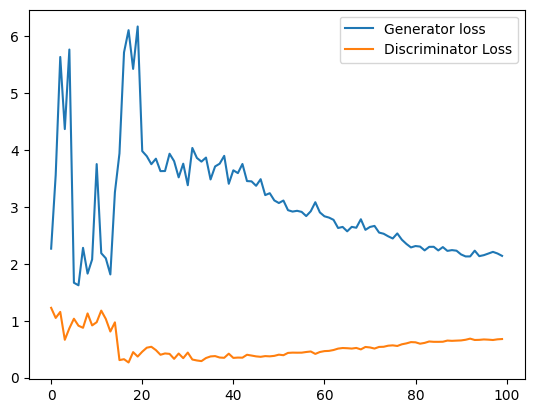

In [17]:


# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')
plt.show()

In [18]:
### TEST CELL ###
# for bi, data in enumerate(train_loader):
#     samples = data[0]
#     reals = data[1]
    
#     print(bi)
#     print(samples.shape[0])
#     print(reals.shape)

In [19]:
# for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
#     images = data[0]
#     reals = data[1]
#     print(reals[bi])

In [20]:
print(type(optim_d))

<class 'torch.optim.adam.Adam'>


In [21]:
print(losses_g)
print(losses_d)

[2.26513409614563, 3.558664321899414, 5.632334232330322, 4.3655900955200195, 5.762989521026611, 1.6663599014282227, 1.6217668056488037, 2.2794437408447266, 1.8269153833389282, 2.0760200023651123, 3.7508113384246826, 2.185309410095215, 2.0961875915527344, 1.8125518560409546, 3.255802631378174, 3.9382100105285645, 5.713115692138672, 6.102987766265869, 5.422789573669434, 6.168034076690674, 3.9786181449890137, 3.889346122741699, 3.7489771842956543, 3.8455560207366943, 3.6273703575134277, 3.628664016723633, 3.9327449798583984, 3.802131175994873, 3.5176780223846436, 3.757772445678711, 3.379661798477173, 4.034201622009277, 3.858705759048462, 3.794130802154541, 3.8650338649749756, 3.4811623096466064, 3.709491491317749, 3.7576513290405273, 3.8955070972442627, 3.4048027992248535, 3.641610860824585, 3.5924324989318848, 3.7525694370269775, 3.452537775039673, 3.4473214149475098, 3.3694088459014893, 3.4855735301971436, 3.20590877532959, 3.2393805980682373, 3.1124303340911865, 3.0668609142303467, 3.1

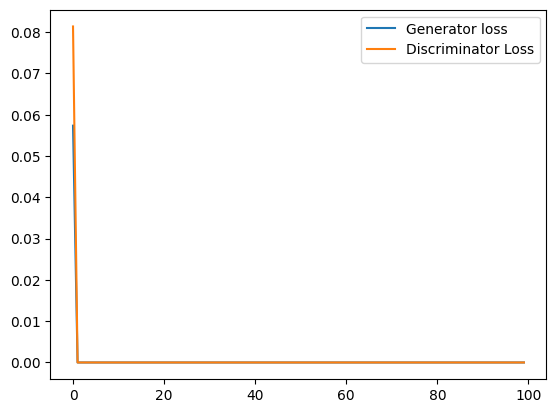

In [22]:
g=0.05734683573246002
d=0.08136825263500214

g_list = np.zeros(100)
d_list = np.zeros(100)

g_list[0] = g
d_list[0] = d

plt.figure()
plt.plot(g_list, label='Generator loss')
plt.plot(d_list, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')
plt.show()